In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
feng_df = pd.read_csv("../data/processed/train_new_feature.csv") 

Xf = feng_df.drop(['status_group'], axis=1) #'id',
yf = feng_df['status_group']
feng_df.shape

(59400, 37)

In [3]:
fevl_df = pd.read_csv("../data/processed/train_encoded_.csv") 

Xv = fevl_df.drop(['status_group'], axis=1) #'id', ,'lat_bin','lon_bin','location_bucket'
yv = fevl_df['status_group']
fevl_df.shape

(59400, 22)

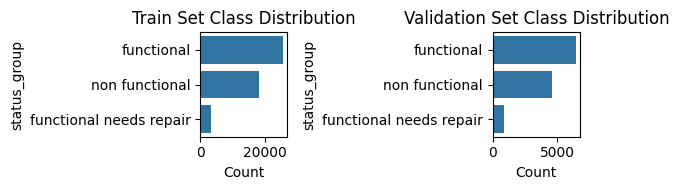

In [4]:
# Split data (X and y are already defined)
Xf_train, Xf_val, yf_train, yf_val = train_test_split(
    Xf, yf, test_size=0.2, stratify=yf, random_state=42
)

# Check class distribution
def plot_class_distribution(y1, y2, labels=["Train", "Validation"]):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2))
    for ax, y_split, label in zip(axs, [y1, y2], labels):
        sns.countplot(y=y_split, order=yf.value_counts().index, ax=ax)
        ax.set_title(f"{label} Set Class Distribution")
        ax.set_xlabel("Count")
    plt.tight_layout()
    plt.show()

plot_class_distribution(yf_train, yf_val)

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reusable evaluation function
def evaluate_model(model, Xf, yf, cv=5, scoring="f1_macro"):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, Xf, yf, cv=skf, scoring=scoring)
    return scores.mean(), scores.std()

In [6]:
print(yf_train.value_counts(normalize=True))

status_group
functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: proportion, dtype: float64


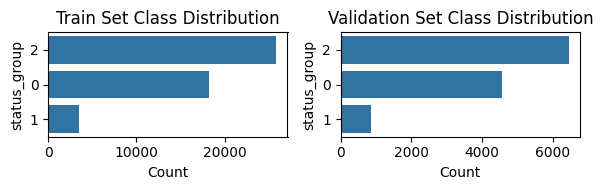

In [7]:
# Split data (X and y are already defined)
Xv_train, Xv_val, yv_train, yv_val = train_test_split(
    Xv, yv, test_size=0.2, stratify=yv, random_state=42
)

# Check class distribution
def plot_class_distribution(y1, y2, labels=["Train", "Validation"]):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2))
    for ax, y_split, label in zip(axs, [y1, y2], labels):
        sns.countplot(y=y_split, order=yv.value_counts().index, ax=ax)
        ax.set_title(f"{label} Set Class Distribution")
        ax.set_xlabel("Count")
    plt.tight_layout()
    plt.show()

plot_class_distribution(yv_train, yv_val)

In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reusable evaluation function
def evaluate_model(model, Xv, yv, cv=5, scoring="f1_macro"):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, Xv, yv, cv=skf, scoring=scoring)
    return scores.mean(), scores.std()

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define models
baseline_models = {
    "Dummy (Most Frequent)": DummyClassifier(strategy="most_frequent", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Evaluate each
results = []
for name, model in baseline_models.items():
    f1, std = evaluate_model(model, Xv_train, yv_train)
    results.append((name, f1, std))


/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

In [10]:
print(yv_train.value_counts(normalize=True))

status_group
2    0.543077
0    0.384238
1    0.072685
Name: proportion, dtype: float64


In [11]:
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='multinomial')
dt_weighted = DecisionTreeClassifier(class_weight='balanced', max_depth=5)

# Add to models dict
baseline_models["LogReg (Balanced)"] = logreg_weighted
baseline_models["Decision Tree (Balanced)"] = dt_weighted

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def print_eval_metrics(model, X_val, y_val, name="Model"):
    model.fit(Xv_train, yv_train)
    yv_pred = model.predict(X_val)
    print(f"\n{name} Evaluation:")
    print(classification_report(yv_val, yv_pred))
    ConfusionMatrixDisplay(confusion_matrix(yv_val, yv_pred), display_labels=model.classes_).plot(cmap='Blues')


Dummy (Most Frequent) Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4565
           1       0.00      0.00      0.00       863
           2       0.54      1.00      0.70      6452

    accuracy                           0.54     11880
   macro avg       0.18      0.33      0.23     11880
weighted avg       0.29      0.54      0.38     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.27      0.37      4565
           1       0.00      0.00      0.00       863
           2       0.59      0.89      0.71      6452

    accuracy                           0.59     11880
   macro avg       0.39      0.39      0.36     11880
weighted avg       0.55      0.59      0.53     11880


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      4565
           1       0.00      0.00      0.00       863
           2       0.68      0.88      0.77      6452

    accuracy                           0.70     11880
   macro avg       0.47      0.48      0.47     11880
weighted avg       0.65      0.70      0.66     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogReg (Balanced) Evaluation:
              precision    recall  f1-score   support

           0       0.55      0.47      0.51      4565
           1       0.12      0.55      0.20       863
           2       0.70      0.45      0.55      6452

    accuracy                           0.47     11880
   macro avg       0.46      0.49      0.42     11880
weighted avg       0.60      0.47      0.51     11880


Decision Tree (Balanced) Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.41      0.56      4565
           1       0.18      0.47      0.26       863
           2       0.67      0.78      0.72      6452

    accuracy                           0.62     11880
   macro avg       0.58      0.55      0.51     11880
weighted avg       0.72      0.62      0.63     11880



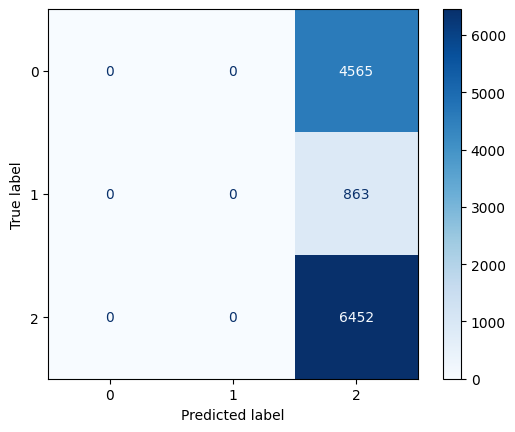

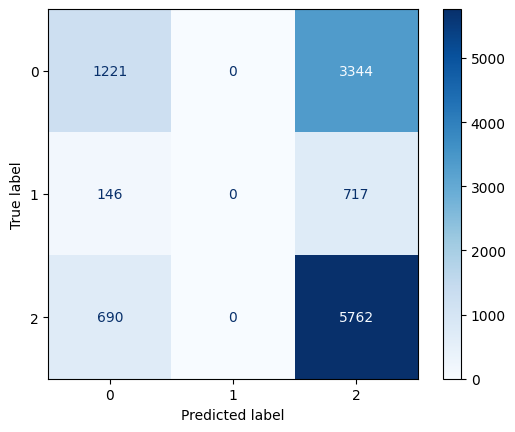

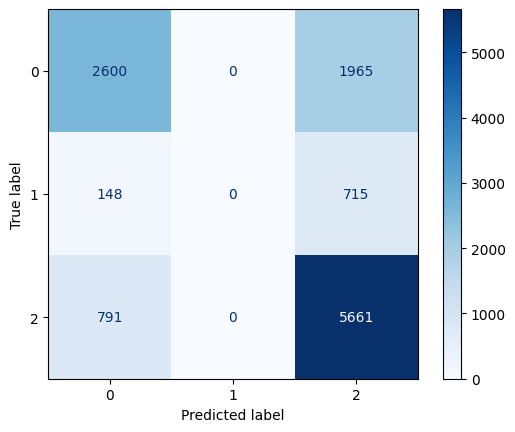

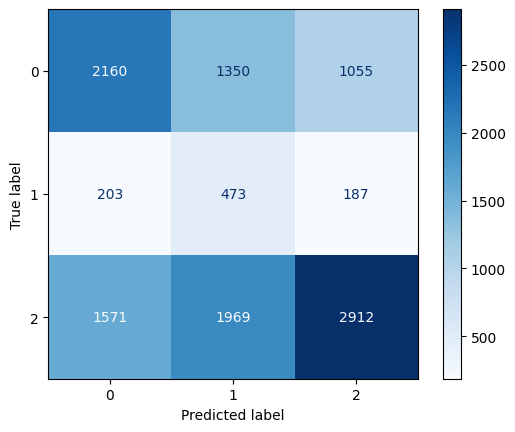

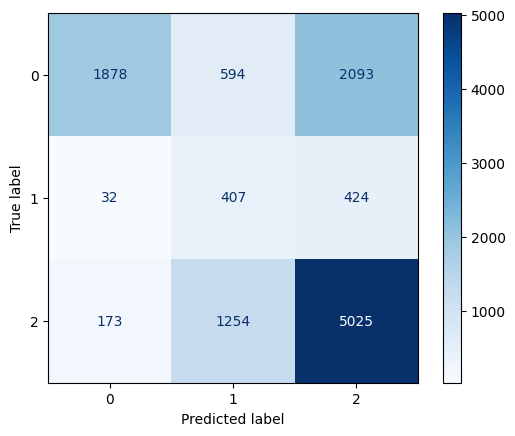

In [13]:
for name, model in baseline_models.items():
    print_eval_metrics(model, Xv_val, yv_val, name)

In [14]:
import pandas as pd

benchmark_df = pd.DataFrame(results, columns=["Model", "F1 Score (CV)", "Std Dev"])
benchmark_df.sort_values("F1 Score (CV)", ascending=False)

,Model,F1 Score (CV),Std Dev
2,Decision Tree,0.477791,0.002144
1,Logistic Regression,0.400746,0.011675
0,Dummy (Most Frequent),0.234629,0.000014


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Simple encoding
X = Xv.fillna('missing')
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, yv, test_size=0.2, stratify=yv, random_state=42)

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4565
           1       0.52      0.33      0.41       863
           2       0.80      0.88      0.84      6452

    accuracy                           0.80     11880
   macro avg       0.72      0.66      0.68     11880
weighted avg       0.79      0.80      0.79     11880



In [16]:
y_train.value_counts(normalize=True)

status_group
2    0.543077
0    0.384238
1    0.072685
Name: proportion, dtype: float64

In [17]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [19]:
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    scoring='f1_macro',
    cv=3,
    n_iter=20,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   9.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n

/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  38.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  35.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  34.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  33.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END max_depth=None, max_feature

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [20]:
from sklearn.metrics import classification_report

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", search.best_params_)
print("F1 Macro:", search.best_score_)
print(classification_report(y_test, y_pred))


Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
F1 Macro: 0.8257071111836036
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4565
           1       0.45      0.41      0.43       863
           2       0.82      0.85      0.83      6452

    accuracy                           0.79     11880
   macro avg       0.69      0.68      0.69     11880
weighted avg       0.79      0.79      0.79     11880



In [21]:
y_resampled.value_counts(normalize=True)

status_group
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64

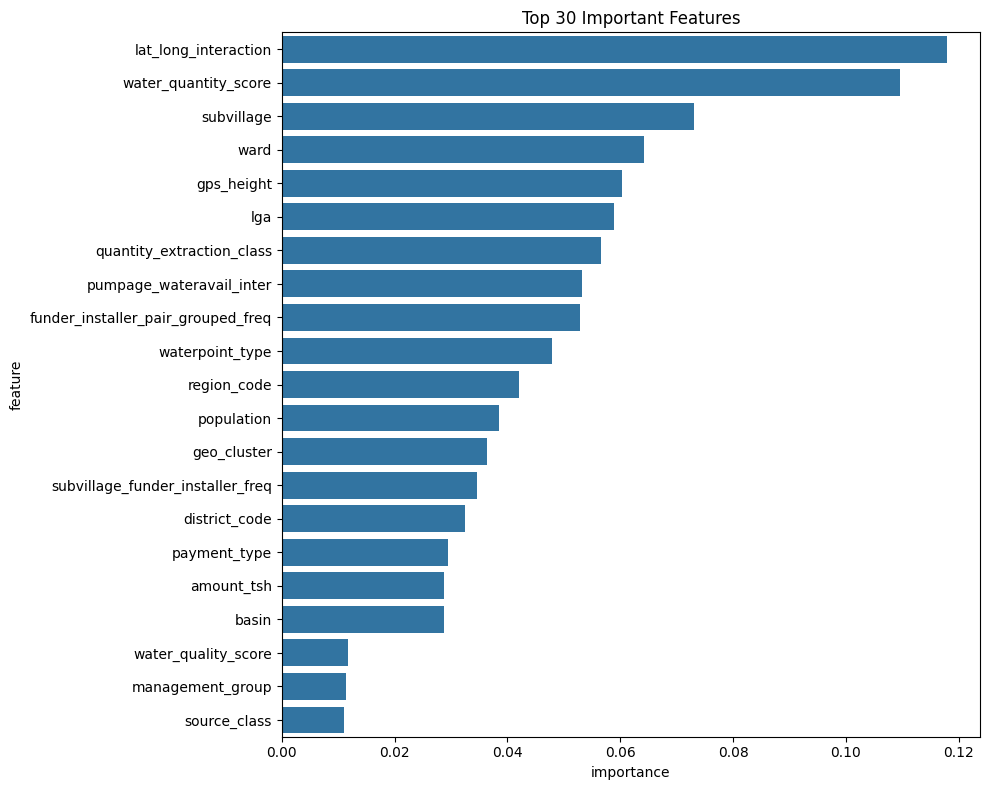

In [22]:
feat_names = X_resampled.columns
feat_imp = search.best_estimator_.feature_importances_

imp_df = pd.DataFrame({
    'feature': feat_names,
    'importance': feat_imp
}).sort_values(by='importance', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.barplot(data=imp_df.head(30), x='importance', y='feature')
plt.title("Top 30 Important Features")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(search.best_estimator_, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print(f"CV F1-macro mean: {scores.mean():.3f}")

CV F1-macro mean: 0.843


CV F1-macro mean: 0.835
CV F1-macro mean: 0.837
CV F1-macro mean: 0.843

In [31]:
test_Set = pd.read_csv("../data/processed/test_encoded_.csv")
test_Set.shape

(14850, 22)

In [33]:
test_Set = test_Set.set_index('id')

In [34]:
y_test_pred = best_model.predict(test_Set)

In [35]:
test_ids = test_Set.index.to_series().reset_index(drop=True)

In [38]:
status_mapping = {
    'non functional': 0,
    'functional needs repair': 1,
    'functional': 2
}

reverse_mapping = {v: k for k, v in status_mapping.items()}

# If y_test_pred is a NumPy array or Series of encoded labels
decoded_preds = [reverse_mapping[pred] for pred in y_test_pred]

In [39]:
submission_RF = pd.DataFrame({
    'id': test_ids,         # this must match the test file format
    'status_group': decoded_preds  # target column as expected in submission
})


submission_RF.to_csv("../data/result/submission_RF.csv", index=False)

## Catboost Model

In [40]:
cat_train_df = pd.read_csv("../data/processed/unchanged_data_all.csv")
print(cat_train_df.shape)
print(cat_train_df.columns)

(59400, 37)
Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'construction_year',
       'extraction_type_group', 'extraction_type_class', 'management_group',
       'payment_type', 'source_type', 'source_class', 'waterpoint_type',
       'status_group', 'funder_installer_pair_grouped_freq', 'pump_age',
       'subvillage_funder_installer_freq', 'water_availability_index',
       'water_quantity_score', 'water_quality_score', 'water_safety_sum',
       'water_safety_prod', 'geo_cluster', 'lat_bin', 'lon_bin',
       'location_bucket', 'lat_long_interaction', 'pumpage_wateravail_inter',
       'quantity_extraction_class'],
      dtype='object')


In [41]:
Xc = cat_train_df.drop(['status_group'], axis=1)
yc = cat_train_df['status_group']

🟨 3. Tell CatBoost which columns are categorical
This will let CatBoost handle them natively — no encoding needed.
Let’s say you're working with a DataFrame X that includes both numeric and categorical columns:

In [42]:
cat_features = Xc.select_dtypes(include='object').columns.tolist()

In [44]:
cat_train_df = cat_train_df.drop(['management_group'], axis=1) # ,'quality_group'
cat_train_df.shape

(59400, 36)

In [45]:
categorical_columns = [
    'funder', 'installer','subvillage','lga','ward', 'basin',  
    'extraction_type', 'management','payment_type','water_quality', 
    'source','waterpoint_type', 'funder_installer_pair_grouped','subvillage_funder_installer'
] # 'scheme_management', 'payment', 

In [46]:
from catboost import CatBoostClassifier

# CatBoost can automatically handle missing values and categorical variables
modelc = CatBoostClassifier(
    eval_metric='MultiClass',     # default multi-class logloss (single scalar)
    custom_metric='F1',
    iterations=1000,
    early_stopping_rounds=50,
    learning_rate=0.1,
    depth=6,
    verbose=100,
    random_seed=42
)


## 🧪 4. Train/Test Split and Fit

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.2, stratify=yc, random_state=42
)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [48]:
modelc.fit(X_train, y_train, cat_features=cat_features) #modelc.fit(X_resampled, y_resampled, cat_features=cat_features)

0:	learn: 1.0205246	total: 148ms	remaining: 2m 28s
100:	learn: 0.5275228	total: 7.77s	remaining: 1m 9s
200:	learn: 0.5019118	total: 15.2s	remaining: 1m
300:	learn: 0.4872738	total: 22.6s	remaining: 52.6s
400:	learn: 0.4749320	total: 30.1s	remaining: 45s
500:	learn: 0.4650278	total: 37.6s	remaining: 37.4s
600:	learn: 0.4561868	total: 45.1s	remaining: 29.9s
700:	learn: 0.4477692	total: 52.6s	remaining: 22.4s
800:	learn: 0.4393340	total: 1m	remaining: 15s
900:	learn: 0.4318953	total: 1m 8s	remaining: 7.5s
999:	learn: 0.4239287	total: 1m 16s	remaining: 0us


## 📊 5. Evaluate the Model

In [49]:
from sklearn.metrics import classification_report

y_pred = modelc.predict(X_test)
print(classification_report(y_test, y_pred))


                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      6452
functional needs repair       0.63      0.31      0.41       863
         non functional       0.85      0.78      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.76      0.66      0.69     11880
           weighted avg       0.81      0.81      0.80     11880



Want to compare CatBoost vs RandomForest directly? Track the f1_macro for both and log them like this:



  precision    recall  f1-score   support

           0       0.82      0.71      0.76      4565
           1       0.78      0.85      0.81      6452
           2       0.39      0.41      0.40       863

    accuracy                           0.76     11880
   macro avg       0.66      0.66      0.66     11880
weighted avg       0.77      0.76      0.76     11880

In [51]:
from sklearn.metrics import f1_score

score = f1_score(y_test, y_pred, average='macro')
print(f"CatBoost F1-macro: {score:.3f}")

CatBoost F1-macro: 0.691


## 🔧 6. Optional: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500]
}

cb_model = CatBoostClassifier(verbose=0, random_seed=42)
search = GridSearchCV(cb_model, param_grid=params, scoring='f1_macro', cv=3)
search.fit(X_train, y_train, cat_features=cat_features)

best_model = search.best_estimator_


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_model.get_feature_importance()
features = X_train.columns

imp_df = pd.DataFrame({'feature': features, 'importance': importances})
imp_df = imp_df.sort_values(by='importance', ascending=False)

sns.barplot(data=imp_df.head(20), x='importance', y='feature')
plt.title("Top 20 Feature Importances - CatBoost")
plt.tight_layout()
plt.show()

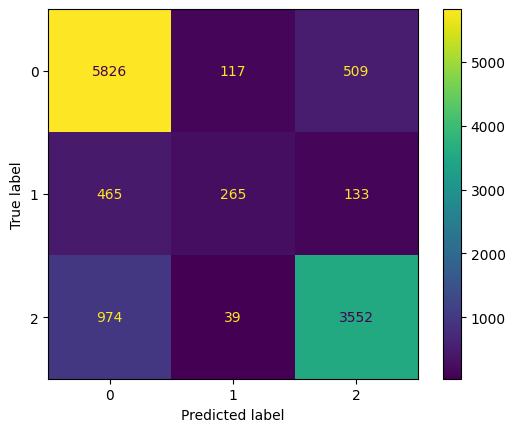

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print("Best Estimator:", search.best_estimator_)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Split X_train into a smaller training set and a validation set
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Get unique class labels
classes = np.unique(y_train)

# Compute weights inversely proportional to class frequency
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))

print("Class weights:", class_weights)


# Define and train the model
model = CatBoostClassifier(
    iterations=1000,
    eval_metric='MultiClass',
    custom_metric='F1',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100
)

model.fit(
    X_train_sub, y_train_sub,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid)
)

# Evaluate on the validation set
y_pred = model.predict(X_valid)
print("F1 macro:", f1_score(y_valid, y_pred, average='macro'))

In [62]:
fneng_df = pd.read_csv("../data/processed/train_new_feature.csv") 
cat_train_df = fneng_df
print(cat_train_df.shape)
print(cat_train_df.columns)

(59400, 37)
Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'construction_year',
       'extraction_type_group', 'extraction_type_class', 'management_group',
       'payment_type', 'source_type', 'source_class', 'waterpoint_type',
       'status_group', 'funder_installer_pair_grouped_freq', 'pump_age',
       'subvillage_funder_installer_freq', 'water_availability_index',
       'water_quantity_score', 'water_quality_score', 'water_safety_sum',
       'water_safety_prod', 'geo_cluster', 'lat_bin', 'lon_bin',
       'location_bucket', 'lat_long_interaction', 'pumpage_wateravail_inter',
       'quantity_extraction_class'],
      dtype='object')


In [63]:
Xc = cat_train_df.drop(['status_group'], axis=1)
yc = cat_train_df['status_group']

cat_features = Xc.select_dtypes(include='object').columns.tolist()

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report
from catboost import CatBoostClassifier

# --- STEP 1: Split your data (train/test) ---
X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.2, stratify=yc, random_state=42
)

# --- STEP 2: Handle class imbalance ---
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# --- STEP 3: Define model ---
model = CatBoostClassifier(
    verbose=0,
    random_seed=42,
    eval_metric='MultiClass',
    early_stopping_rounds=None,
    #use_best_model=True,
    class_weights=class_weights
)

# --- STEP 4: Define hyperparameter search space ---
param_dist = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3],
    'iterations': [100, 200]
}

# --- STEP 5: Set up randomized search with stratified CV ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='f1_macro',
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1
)

Before restarting full tuning, you can time a single fit. That gives you a real estimate of how long a tuning job will take.

In [65]:
import time
start = time.time()
model.fit(X_train, y_train, cat_features=cat_features)
print("Train time:", time.time() - start, "seconds")


Train time: 81.22177219390869 seconds


Fitting 3 folds for each of 5 candidates, totalling 15 fits
F1 Macro: 0.6769492363119919
Classification Report:
                          precision    recall  f1-score   support

             functional       0.85      0.76      0.80      6452
functional needs repair       0.31      0.70      0.43       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.76     11880
              macro avg       0.67      0.74      0.68     11880
           weighted avg       0.81      0.76      0.78     11880



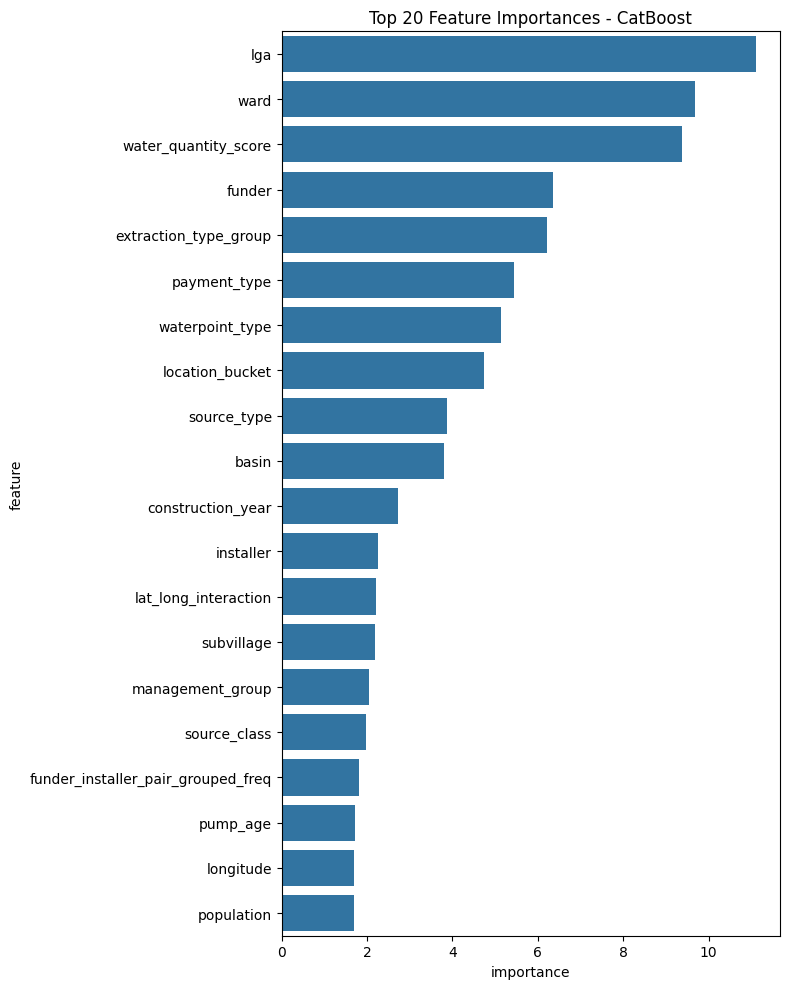

In [66]:
# Identify categorical feature indices
# cat_features = ['region', 'extraction_type', 'installer', ...]
# If using DataFrame: you can use column names instead
search.fit(X_train, y_train, cat_features=cat_features)

# --- STEP 6: Evaluate best model ---
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
print("F1 Macro:", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- STEP 7: (Optional) Feature importance ---
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = best_model.get_feature_importance()
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

imp_df = pd.DataFrame({'feature': features, 'importance': feat_importance})
imp_df = imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(data=imp_df.head(20), x='importance', y='feature')
plt.title("Top 20 Feature Importances - CatBoost")
plt.tight_layout()
plt.show()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Base model (no tuning)
untuned_model = CatBoostClassifier(
    iterations=500,
    random_seed=42,
    verbose=0,
    cat_features=cat_features
)
untuned_model.fit(X_train, y_train)
untuned_preds = untuned_model.predict(X_test)

# Print untuned score
print("Untuned F1 Macro:", f1_score(y_test, untuned_preds, average='macro'))

# Hyperparameter tuning
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'iterations': [200, 500, 1000]
}

model = CatBoostClassifier(
    verbose=0,
    random_seed=42,
    eval_metric='MultiClass',
    early_stopping_rounds=50,
    class_weights=class_weights
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_macro',
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train, cat_features=cat_features)

# Best model
tuned_model = search.best_estimator_
tuned_preds = tuned_model.predict(X_test)

# Print tuned score
print("Tuned F1 Macro:", f1_score(y_test, tuned_preds, average='macro'))
print("Classification Report:\n", classification_report(y_test, tuned_preds))

# Plot top 10 hyperparameter combinations
cv_results = pd.DataFrame(search.cv_results_)
top = cv_results.sort_values(by='mean_test_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='mean_test_score', y=top.index, data=top, palette='viridis')
plt.xlabel("F1 Macro (Cross-Validated)")
plt.title("Top 10 Hyperparameter Sets from RandomizedSearchCV")
plt.tight_layout()
plt.show()

# Save all results
cv_results.sort_values(by='mean_test_score', ascending=False).to_csv("catboost_tuning_results.csv", index=False)

# Feature importance plot
feat_importance = tuned_model.get_feature_importance()
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

imp_df = pd.DataFrame({'feature': features, 'importance': feat_importance})
imp_df = imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(data=imp_df.head(20), x='importance', y='feature')
plt.title("Top 20 Feature Importances - CatBoost")
plt.tight_layout()
plt.show()